![molprop](https://storage.googleapis.com/polaris-public/icons/icons8-fox-60-kinases.png)

## RET wild type Benchmark 


### Background
**RET (Rearranged during Transfection)** is a proto-oncogene that codes for a receptor tyrosine kinase. This means it produces a protein that plays a role in signaling pathways within cells, particularly related to cell growth and differentiation. When activated, RET helps regulate cell survival, proliferation, and differentiation. Mutations or alterations in the RET gene can lead to uncontrolled cell growth and potentially the development of cancer.

### Benchmarking
- **RET wild type**: In some cases, targeting both mutant and wild-type RET together can be more effective than targeting only one form as Combination Therapies. In certain cancer types, such as some subtypes of non-small cell lung cancer (NSCLC), the RET signaling pathway can interact with other oncogenic pathways, such as the EGFR (epidermal growth factor receptor) pathway. Targeting both pathways simultaneously might offer a synergistic effect and improve treatment outcomes.

The goal of this benchmark is to select the best predictive model for 
- Optimization of the bioactivity % inhibition.
- Discovery of potential hits in new chemical space.



### Description of readout 
- **Readouts**: `RET`
- **Bioassay readout**: percentage of inhibition.
- **Optimization objective**: Higher inhibition


### Data resource: 
- **Reference**: [PKIS2](https://www.ncbi.nlm.nih.gov/pubmed/28767711)

### Train/test split
Given the benchmarking goal, a scaffold-based splitting approach was applied to ensure training and test sets contain distinct chemical structures while maintaining the diversity of scaffolds.


In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
import pathlib

import datamol as dm

import polaris as po

# polaris benchmark
from polaris.benchmark import SingleTaskBenchmarkSpecification

# polaris hub
from polaris.utils.types import HubOwner

# utils
root = pathlib.Path("__file__").absolute().parents[3]
os.chdir(root)
sys.path.insert(0, str(root))
from utils.docs_utils import load_readme

In [2]:
# Get the owner and organization
org = "polaris"
data_name = "drewry2017_pkis2_subset"
dataset_version = "v2"
dataset_name = f"drewry2017_pkis2_subset-{dataset_version}"
dirname = dm.fs.join(root, f"org-{org}", data_name)
gcp_root = f"gs://polaris-public/polaris-recipes/org-{org}/{data_name}"

owner = HubOwner(slug=org, type="organization")
owner

HubOwner(slug='polaris', external_id=None, type='organization')

In [3]:
BENCHMARK_DIR = f"{gcp_root}/benchmarks"
DATASET_JSON = f"{gcp_root}/datasets/{dataset_name}/dataset.json"

FIGURE_DIR = f"{gcp_root}/figures"

## Load existing dataset object
> **Attention:** \
> The original dataset is published in https://www.ncbi.nlm.nih.gov/pubmed/28767711 \
> 
> To **maintain consistency** with other benchmarks in the Polaris Hub, a thorough data curation process is carried out to ensure the accuracy of molecular presentations.
> Therefore, the raw data from the data resource is not used here. 
> See more curation details in [01_pkis2_kinase_data_curation.ipynb](https://github.com/polaris-hub/polaris-recipes/blob/main/org-Polaris/drewry2017_pkis2_subset/01_pkis2_kinase_data_curation.ipynb).


In [4]:
# Load the saved Dataset
from polaris.dataset import Dataset

dataset = po.load_dataset("polaris/drewry2017-pkis2-subset-v2")

⠙ Fetching dataset... 

2024-09-10 15:22:40.431 | INFO     | polaris._artifact:_validate_version:66 - The version of Polaris that was used to create the artifact (dev) is different from the currently installed version of Polaris (0.7.9).
2024-09-10 15:22:40.433 | WARNING  | polaris.mixins._checksum:verify_checksum:58 - No checksum to verify against. Specify either the md5sum parameter or store the checksum in the dataset.md5sum attribute.


✅ SUCCESS: Fetched dataset.
 


/Users/lu.zhu/miniconda3/envs/po_dataset/lib/python3.12/site-packages/yaspin/core.py:228: UserWarning: color, on_color and attrs are not supported when running in jupyter
  self._color = self._set_color(value) if value else value


In [5]:
# Display dataset
dataset

2024-09-10 15:22:40.455 | INFO     | polaris.mixins._checksum:md5sum:27 - Computing the checksum. This can be slow for large datasets.


{
  "name": "drewry2017-pkis2-subset-v2",
  "description": "A subset of PKIS 2 dataset only including EGFR, RET, KIT, LOK and SLK kinases. Profile of kinases PKIS2 which contains 640 small molecule for 468 kinases.",
  "tags": [
    "Kinase",
    "HitDiscovery",
    "Selectivity"
  ],
  "user_attributes": {
    "year": "2017"
  },
  "owner": "polaris",
  "polaris_version": "dev",
  "default_adapters": {},
  "zarr_root_path": null,
  "readme": "## Backgroud:\n Kinases play a crucial role in cellular signalling, making them important targets for drug development. Dysregulation of kinases is frequently implicated in diseases like cancer, inflammation, and neurodegenerative disorders. Therefore, targeting kinases with specific drugs has emerged as a crucial strategy in modern drug discovery. Kinase-related task includes inhibition prediction, selectivity prediction, or kinase-ligand binding affinity prediction. In the early release version of Polaris, benchmarks were established for kinases such as EGFR, KIT, and RET, along with their respective mutations, as well as for LOK and SLK.\n\n\nAn example of Kinase screening (image from [here](https://www.medchemexpress.com/Kinase-screening.html)):\n![kinase](https://file.medchemexpress.com/new/images/web/kinase-tree-en.png)\n\n## Description of readout \n- **Readouts**: `EGFR`, `KIT`, `RET`, `LOK`, `SLK`\n- **Bioassay readout**: Percentage of inhibition (%).\n- **Optimization objective**: Higher potency (higher %inhibition).\n\n## Data resource:\nPKIS2: A second chemogenomics set of kinase inhibitors from GSK, Takeda, and Pfizer was assembled as PKIS2. This set contained 645 inhibitors and included many additional chemotypes that were not represented in the original set.\n\n**Reference**: https://www.ncbi.nlm.nih.gov/pubmed/28767711\n\n## Data curation\nTo **maintain consistency** with other benchmarks in the Polaris Hub, a thorough data curation process is carried out to ensure the accuracy of molecular presentations.\n\nThe full curation and creation process is documented [here](https://github.com/polaris-hub/polaris-recipes/tree/main/org-Polaris/drewry2017_pkis2_subset/01_pkis2_kinase_data_curation.ipynb).\n\n## Disclaimer\nHere are some additional details that may be of use when deciding whether or not to use this dataset. \n\nSome advantages include: \n\n- The assays were carried out by one group under a consistent set of conditions.\n- The dataset contains only a small number of molecules with unspecified stereocenters.\n- There are no duplicate structures in the dataset.\n- The data is based on well-defined biochemical endpoint.\n\nSome limitations to consider: \n\n- The assay endpoint is % inhibition, which is less desirable than a dose-response but similar to what is commonly encountered with HTS data.\n- The dataset is relatively small, containing only 640 compounds. This, combined with the fact that the data is highly clustered, will make it difficult to see statistically significant differences between methods. This will be highly acute when the splits are based on clusters or scaffolds.\n- The compounds are highly clustered with the largest cluster containing 50 compounds. The compounds are highly clustered with the largest cluster containing 50 compounds.\n",
  "annotations": {
    "KIT": {
      "is_pointer": false,
      "modality": "UNKNOWN",
      "description": "Percentage of inhibition on KIT with mutation NaN",
      "user_attributes": {
        "unit": "%",
        "source": "PKIS2",
        "target": "KIT",
        "mutation": "NaN",
        "organism": "Human",
        "objective": "Higher value",
        "concentration": "1uM"
      },
      "dtype": "float64"
    },
    "LOK": {
      "is_pointer": false,
      "modality": "UNKNOWN",
      "description": "Percentage of inhibition on LOK with mutation NaN",
      "user_attributes": {
        "unit": "%",
        "source": "PKIS2",
        "target": "LOK",
        "mutation": "NaN",
        "organism": "Human",


<a id="benchmark"></a>
## Benchmark creation with `Polaris`
Creating a benchmark involves setting up a standard dataset, designing the train-test set and defining evaluation metrics which is used to establish baseline performance level. 

In [6]:
# data columns
data_cols = ["RET"]

### Create scaffold split for `RET` dataset
> **Note:**
> Here we use splitting tool `Splito` to split dataset to train and test. \
> [Splito](https://github.com/datamol-io/splito) is a machine learning dataset splitting library for life sciences.

In [15]:
# scaffold split
from splito import MaxDissimilaritySplit

mol_col = "MOL_smiles"
split_key = "perimeter_split"

TEST_SIZE = 0.2
SEED = 51
splitter = MaxDissimilaritySplit(random_state=SEED)
dataset_feat = [dm.to_fp(mol) for mol in dataset.table[mol_col]]
split = next(splitter.split(X=dataset_feat))

### Check distribution of train/test set in the chemical space

  0%|          | 0/640 [00:00<?, ?it/s]

'https://storage.googleapis.com/polaris-public/polaris-recipes/org-polaris/drewry2017_pkis2_subset/figures/perimeter_split_chemspace.png'

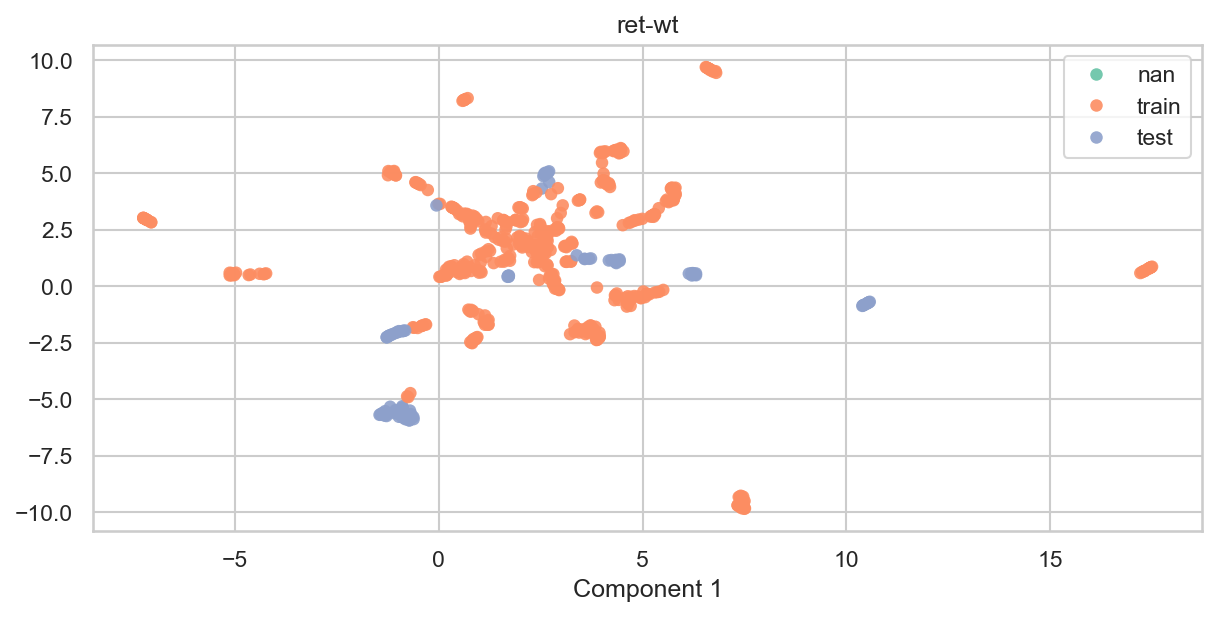

In [17]:
from utils.docs_utils import visualize_split_chemspace

fig = visualize_split_chemspace(
    mols=dataset.table[mol_col].to_list(), train_test_dict={"ret-wt": split}
)

# export the figure to remote path
from utils.auroris_utils import save_image

save_image(fig, dm.fs.join(FIGURE_DIR, f"{split_key}_chemspace.png"))

## Single task for RET WT with scaffold split 

**Regression tasks**

In [18]:
benchmark_version = "v2"
benchmark_name = f"pkis2-ret-wt-ood-reg-{benchmark_version}"
readme_name = "pkis2-ret-wt-reg"
BENCHMARK_SAVE_DIR = f"{BENCHMARK_DIR}/{benchmark_name}"
data_cols = ["RET"]

benchmark_reg = SingleTaskBenchmarkSpecification(
    name=benchmark_name,
    dataset=dataset,
    target_cols=data_cols,
    target_types={col: "regression" for col in data_cols},
    input_cols=mol_col,
    split=split,
    main_metric="mean_squared_error",
    metrics=[
        "mean_absolute_error",
        "mean_squared_error",
        "r2",
        "spearmanr",
        "pearsonr",
        "explained_var",
    ],
    tags=["Kinase", "HitDiscovery", "OOD"],
    description="Singletask regression benchmark for kinase RET wild type.",
    owner=owner,
    readme=load_readme(
        "org-Polaris/drewry2017_pkis2_subset/benchmarks/readme/030_pkis2-ret_reg_readme.md"
    ),
)
path = benchmark_reg.to_json(BENCHMARK_SAVE_DIR)
print(path)

2024-09-10 15:24:18.721 | INFO     | polaris.mixins._checksum:md5sum:27 - Computing the checksum. This can be slow for large datasets.


gs://polaris-public/polaris-recipes/org-polaris/drewry2017_pkis2_subset/benchmarks/pkis2-ret-wt-ood-reg-v2/benchmark.json


In [20]:
# Upload to hub
benchmark_reg.upload_to_hub(owner=owner, access="private")

✅ SUCCESS: Your benchmark has been successfully uploaded to the Hub. View it here: https://polarishub.io/benchmarks/polaris/pkis2-ret-wt-ood-reg-v2
 


{'id': 'vAnqzfiyiKpNvMYd9GzNA',
 'createdAt': '2024-09-10T19:24:49.963Z',
 'deletedAt': None,
 'name': 'pkis2-ret-wt-ood-reg-v2',
 'slug': 'pkis2-ret-wt-ood-reg-v2',
 'description': 'Singletask regression benchmark for kinase RET wild type.',
 'tags': ['Kinase', 'HitDiscovery', 'OOD'],
 'userAttributes': {},
 'access': 'private',
 'isCertified': False,
 'polarisVersion': '0.7.9',
 'readme': "![molprop](https://storage.googleapis.com/polaris-public/icons/icons8-fox-60-kinases.png)\n\n### Background\n**RET (Rearranged during Transfection)** is a proto-oncogene that codes for a receptor tyrosine kinase. This means it produces a protein that plays a role in signaling pathways within cells, particularly related to cell growth and differentiation. When activated, RET helps regulate cell survival, proliferation, and differentiation. Mutations or alterations in the RET gene can lead to uncontrolled cell growth and potentially the development of cancer.\n\n### Benchmarking\n- **RET wild type**:

**Classification tasks**

In [21]:
data_cols = ["CLS_RET"]
benchmark_name = f"pkis2-ret-wt-ood-cls-{benchmark_version}"
BENCHMARK_SAVE_DIR = f"{BENCHMARK_DIR}/{benchmark_name}"

benchmark_cls = SingleTaskBenchmarkSpecification(
    name=benchmark_name,
    dataset=dataset,
    target_cols=data_cols,
    target_types={col: "classification" for col in data_cols},
    input_cols=mol_col,
    split=split,
    main_metric="pr_auc",
    metrics=["accuracy", "f1", "roc_auc", "pr_auc", "mcc", "cohen_kappa"],
    tags=["Kinase", "HitDiscovery", "OOD"],
    description="Single task classification benchmark for kinase RET wild type.",
    owner=owner,
    readme=load_readme(
        "org-Polaris/drewry2017_pkis2_subset/benchmarks/readme/031_pkis2-ret_cls_readme.md"
    ),
)
path = benchmark_cls.to_json(BENCHMARK_SAVE_DIR)
print(path)

2024-09-10 15:24:53.710 | INFO     | polaris.mixins._checksum:md5sum:27 - Computing the checksum. This can be slow for large datasets.


gs://polaris-public/polaris-recipes/org-polaris/drewry2017_pkis2_subset/benchmarks/pkis2-ret-wt-ood-cls-v2/benchmark.json


In [22]:
# Upload to hub
benchmark_cls.upload_to_hub(owner=owner, access="private")

✅ SUCCESS: Your benchmark has been successfully uploaded to the Hub. View it here: https://polarishub.io/benchmarks/polaris/pkis2-ret-wt-ood-cls-v2
 


{'id': '5CWpJX0qcQvcobGRD0jRi',
 'createdAt': '2024-09-10T19:24:57.166Z',
 'deletedAt': None,
 'name': 'pkis2-ret-wt-ood-cls-v2',
 'slug': 'pkis2-ret-wt-ood-cls-v2',
 'description': 'Single task classification benchmark for kinase RET wild type.',
 'tags': ['Kinase', 'HitDiscovery', 'OOD'],
 'userAttributes': {},
 'access': 'private',
 'isCertified': False,
 'polarisVersion': '0.7.9',
 'readme': '## Background\n**RET (Rearranged during Transfection)** is a proto-oncogene that codes for a receptor tyrosine kinase. This means it produces a protein that plays a role in signaling pathways within cells, particularly related to cell growth and differentiation. When activated, RET helps regulate cell survival, proliferation, and differentiation. Mutations or alterations in the RET gene can lead to uncontrolled cell growth and potentially the development of cancer.\n\n## Benchmarking\n**RET wild type**: In some cases, targeting both mutant and wild-type RET together can be more effective than 